In [414]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import set_config

plt.style.use('fivethirtyeight')

In [415]:
DATA_URL = 'https://ids-storage-football-prediction.s3-eu-west-1.amazonaws.com/data_mmwd/listings_polarity_distance.csv'
SCALED_DATA_URL = 'https://ids-storage-football-prediction.s3-eu-west-1.amazonaws.com/data_mmwd/listings_scalled.csv'

In [416]:
df = pd.read_csv(SCALED_DATA_URL, index_col='Unnamed: 0')

In [417]:
df['classified'] = 3 * df['scaled_polarity'] + 2 * df['scaled_distance'] + 1 * df['scaled_number_of_reviews']

In [418]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['scaled_classified'] = scaler.fit_transform(df[['classified']])

In [419]:
df.head()

,id,name,description,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,polarity,distance,scaled_distance,scaled_number_of_reviews,scaled_polarity,classified,scaled_classified
0,36642,City Conveniences A Country Setting,<b>The space</b><br />Are you planning a vacat...,45.40159,-75.74679,Private room,2,2,1,1,65.0,87,0.8070,3.177358,0.099113,0.182979,0.892230,3.057894,0.640126
1,59258,Lower level of my house to rent,"Lower 1/2 of bungalow, a separate entrance, 10...",45.35900,-75.80314,Entire home/apt,4,1,1,1,200.0,1,0.9850,9.620935,0.028027,0.000000,0.992090,3.032323,0.634309
2,158824,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,Big 3 bedroom house with backyard in desirable...,45.40248,-75.69941,Entire home/apt,3,1,2,2,140.0,7,0.7430,2.194104,0.146677,0.012766,0.856325,2.875097,0.598547
3,261065,Westboro Village Executive Suite,A tastefully decorated and well equipped upper...,45.38972,-75.75496,Entire home/apt,4,1,1,1,150.0,64,0.8304,4.537074,0.067304,0.134043,0.905358,2.984723,0.623482
4,336692,Quiet Room with a view in the Ottawa Downtown,Renting only to females. Modern condo with pan...,45.41557,-75.70551,Private room,5,1,1,1,69.0,9,0.9537,0.813145,0.407711,0.017021,0.974530,3.756033,0.798923


In [420]:
x = df.loc[:, ['scaled_distance', 'scaled_number_of_reviews', 'scaled_polarity']]
y = df.loc[:, ['scaled_classified']]

In [421]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.75)

In [422]:
dtr = DecisionTreeRegressor(max_depth=5, random_state=0, criterion='mae', splitter='best')
print(dtr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')


In [423]:
dtr.fit(xtrain, ytrain)

score = dtr.score(xtrain, ytrain)

In [424]:
print("R-squared:", score) 

R-squared: 0.9593922625254602


In [425]:
score = dtr.score(xtest, ytest)

In [426]:
print("R-squared:", score) 

R-squared: 0.9065679946212866


In [427]:
ypred = dtr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", mse*(1/2.0))

MSE:  0.0007905519162295807
MAE:  0.020047069221999305
RMSE:  0.00039527595811479036


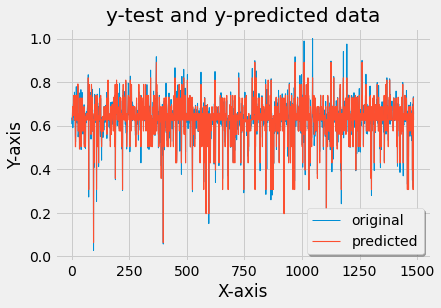

In [428]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [429]:
ytest.head()

,scaled_classified
583,0.637192
1043,0.607988
1837,0.636501
1549,0.678507
1825,0.590809


In [430]:
data_to_merge = pd.DataFrame()

In [431]:
data_to_merge = ytest
data_to_merge['prediction_classified'] = ypred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [432]:
data_to_merge['idx'] = data_to_merge.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [433]:
data_to_merge.reset_index(inplace=True)

In [434]:
data_to_merge = data_to_merge.drop(['scaled_classified'], axis=1)

In [435]:
data_to_merge = data_to_merge.drop(['index'], axis=1)

In [436]:
data_to_merge.head()

,prediction_classified,idx
0,0.626373,583
1,0.626373,1043
2,0.626373,1837
3,0.687619,1549
4,0.646464,1825


In [405]:
data_to_merge.describe()

,prediction_classified,id
count,1486.000000,1486.000000
mean,0.634216,994.618439
std,0.092528,572.140537
min,0.026078,0.000000
25%,0.630528,503.250000
50%,0.630528,1003.500000
75%,0.688138,1495.750000
max,0.882697,1979.000000


In [377]:
data_to_merge.shape

(1486, 2)

In [437]:
df['idx'] = df.index

In [438]:
df = pd.merge(df, data_to_merge, on='idx')

In [441]:
df.shape

(1486, 21)

In [444]:
df = df.drop(['idx'], axis=1)

In [445]:
df.head()

,id,name,description,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,polarity,distance,scaled_distance,scaled_number_of_reviews,scaled_polarity,classified,scaled_classified,prediction_classified
0,59258,Lower level of my house to rent,"Lower 1/2 of bungalow, a separate entrance, 10...",45.35900,-75.80314,Entire home/apt,4,1,1,1,200.0,1,0.9850,9.620935,0.028027,0.000000,0.992090,3.032323,0.634309,0.626373
1,158824,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,Big 3 bedroom house with backyard in desirable...,45.40248,-75.69941,Entire home/apt,3,1,2,2,140.0,7,0.7430,2.194104,0.146677,0.012766,0.856325,2.875097,0.598547,0.646464
2,261065,Westboro Village Executive Suite,A tastefully decorated and well equipped upper...,45.38972,-75.75496,Entire home/apt,4,1,1,1,150.0,64,0.8304,4.537074,0.067304,0.134043,0.905358,2.984723,0.623482,0.575555
3,336692,Quiet Room with a view in the Ottawa Downtown,Renting only to females. Modern condo with pan...,45.41557,-75.70551,Private room,5,1,1,1,69.0,9,0.9537,0.813145,0.407711,0.017021,0.974530,3.756033,0.798923,0.819943
4,413300,Loft-style 2 BR in ByWard Market,"Welcome to your home away from home, 2 bedroom...",45.43399,-75.69105,Entire home/apt,4,1,2,2,90.0,44,0.9599,2.483612,0.128760,0.091489,0.978008,3.283036,0.691336,0.687619


In [446]:
df.to_csv('listing_with_descision_tree_regression.csv')